In [1]:
from tensorflow.keras.applications.imagenet_utils import preprocess_input
from tensorflow.keras.applications.resnet50 import decode_predictions
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import json
import cv2
import random
import os
import sys

from src.utils import show_image, preprocess_image, clip_eps, get_label, plot_combined_histogram
from src.blackbox import generate_adversaries_targeted, verify_watermark, perturb_image

resnet50 = tf.keras.applications.ResNet50(weights="imagenet", include_top=True, classifier_activation=None)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)  
EPS = 0.1 / 255

2025-03-02 15:40:03.281760: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-03-02 15:40:03.281794: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-03-02 15:40:03.283113: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-02 15:40:03.290985: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-03-02 15:40:06.038599: I tensorflow/core/common_

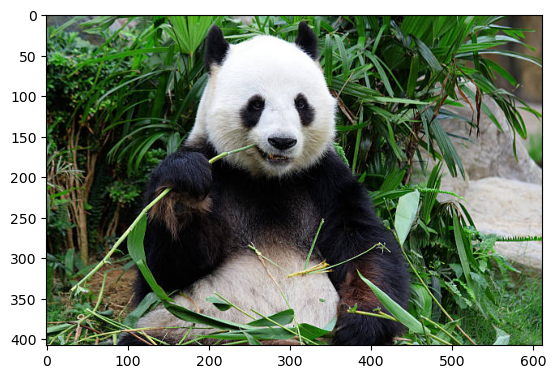

2025-03-02 15:40:11.181788: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8902


1/1 [==============================] - 2s 2s/step

=== Logits Before Perturbation ===
Target Weimaraner: 2.69404
Target plastic_bag: 1.17153
Target spider_web: 0.69563
Target European_gallinule: 0.47942

Applying perturbation for target: Weimaraner (178)


2025-03-02 15:40:12.983037: I external/local_xla/xla/service/service.cc:168] XLA service 0x5620700a7d60 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-03-02 15:40:12.983055: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce GTX 1080 Ti, Compute Capability 6.1
2025-03-02 15:40:12.989235: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1740958813.155228    2393 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.



Applying perturbation for target: plastic_bag (728)

Applying perturbation for target: spider_web (815)

Applying perturbation for target: European_gallinule (136)
tf.Tensor(
[[[[ -2.265267    -2.705905    -2.9386923 ]
   [ 10.318163     4.571573     4.784346  ]
   [ -4.8598456   -6.3360033   -8.639637  ]
   ...
   [ -7.3586774   -7.390693    -7.0496607 ]
   [ -0.8039366   -1.8297597   -5.1544633 ]
   [  6.134181     5.9962173    7.1465483 ]]

  [[-10.509296    -9.64262     -5.0522995 ]
   [ -9.114743   -10.039265    -9.388099  ]
   [  6.370789     6.4672728    5.2819624 ]
   ...
   [ -2.335907    -2.0989394    5.2528396 ]
   [  4.9972043    4.3318954    3.9669964 ]
   [  2.866696     2.4992778   -2.047605  ]]

  [[  4.8617187    5.519543     5.492509  ]
   [  4.620025     6.056081     4.7471504 ]
   [ -5.916224    -4.6428304   -5.3351064 ]
   ...
   [  8.745108     8.676002     9.622416  ]
   [  0.96854943   0.74505     -0.03472517]
   [ -8.046681    -9.6229105   -7.767498  ]]

  ...

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



=== Logits After Perturbation ===
Target Weimaraner: 4.25192
Target plastic_bag: 3.52611
Target spider_web: 4.94595
Target European_gallinule: 4.32015
Label: Weimaraner (178) | Logit Before: 2.69404 | Logit After: 4.25192 | Logit Diff: 1.55788
Label: plastic_bag (728) | Logit Before: 1.17153 | Logit After: 3.52611 | Logit Diff: 2.35458
Label: spider_web (815) | Logit Before: 0.69563 | Logit After: 4.94595 | Logit Diff: 4.25032
Label: European_gallinule (136) | Logit Before: 0.47942 | Logit After: 4.32015 | Logit Diff: 3.84073
3.000876545906067

Watermark Verification: Success


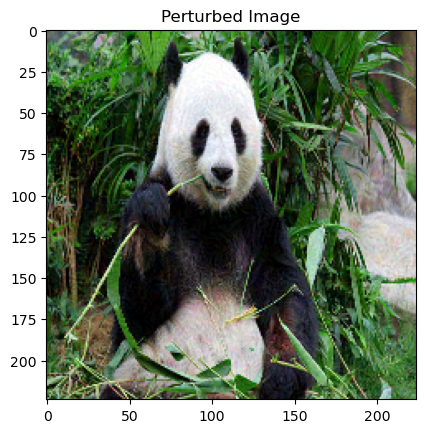

Watermarked image saved as blackbox_watermarked_image.jpg


In [2]:
org,final = perturb_image("examples/panda.jpg", 341, resnet50, optimizer, EPS, k=4)

In [3]:
org = np.array(org).flatten().tolist()
final = np.array(final).flatten().tolist()

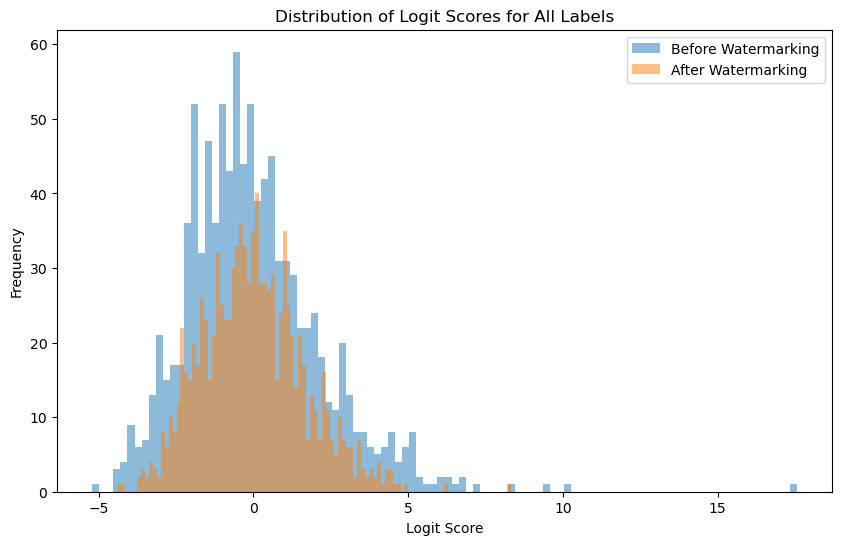

In [4]:
plot_combined_histogram(org,final)